<a href="https://colab.research.google.com/github/p25-c4/kurly_project/blob/main/0322_HY_%EA%B3%A0%EA%B0%9D%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

import zipfile
import io

from tqdm import tqdm
from tqdm import trange, notebook
from tqdm.notebook import tqdm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [ ]:
import os
os.chdir("C:\workspace\early_project")

In [ ]:
# ZIP 파일 경로
zip_file_path = 'kurly.zip'
# ZIP 파일 열기
with zipfile.ZipFile(zip_file_path) as z:
    # ZIP 파일 내에서 'total.csv' 찾기
    with z.open('kurly.csv') as csv_file:
        # CSV 파일을 Pandas DataFrame으로 읽기
        df = pd.read_csv(csv_file)

In [ ]:
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018711 entries, 0 to 1018710
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   idUser             1018711 non-null  object
 1   idOrder            1018711 non-null  object
 2   OrderDT            1018711 non-null  object
 3   ItemCode           1018711 non-null  object
 4   Price              1018711 non-null  int64 
 5   DeliveryDT         1018711 non-null  object
 6   Delay_YN           1018711 non-null  int64 
 7   ItemLargeCode      1018711 non-null  object
 8   ItemLargeName      1018711 non-null  object
 9   ItemMiddleCode     1018711 non-null  object
 10  ItemMiddleName     1018711 non-null  object
 11  ItemSmallCode      1018711 non-null  object
 12  ItemSmallName      1018711 non-null  object
 13  ItemName           1018711 non-null  object
 14  Gender             1018711 non-null  object
 15  Age                1018711 non-null  int64 
 16  

# 고객 구성 비율 & 고객 특성 별 매출액 그래프

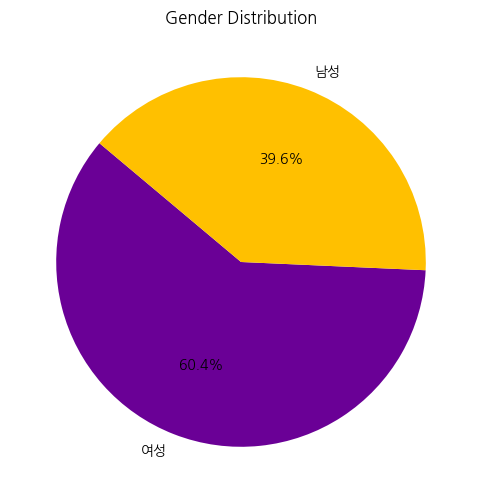

In [ ]:
gender_counts = df['Gender'].value_counts(normalize=True)
colors = ['#6A0096', '#FFC000']

# 파이 차트로 성별 비율 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')  # 그래프 제목 설정
plt.show()

- 성별의 비율이 여성: 60.4% , 남성: 39.6% 으로 여성이 남성보다 약 21% 더 많음.

In [ ]:
# OrderDT 열을 datetime 객체로 변환
df['OrderDT'] = pd.to_datetime(df['OrderDT'], format='%Y-%m-%d %H:%M:%S')
df['DeliveryDT'] = pd.to_datetime(df['DeliveryDT'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
week_count = pd.DataFrame(df['WeekdayName'].value_counts())
week_count

,count
WeekdayName,
Sunday,219884
Wednesday,184196
Thursday,177005
Tuesday,158020
Monday,143335
Friday,126732
Saturday,9539


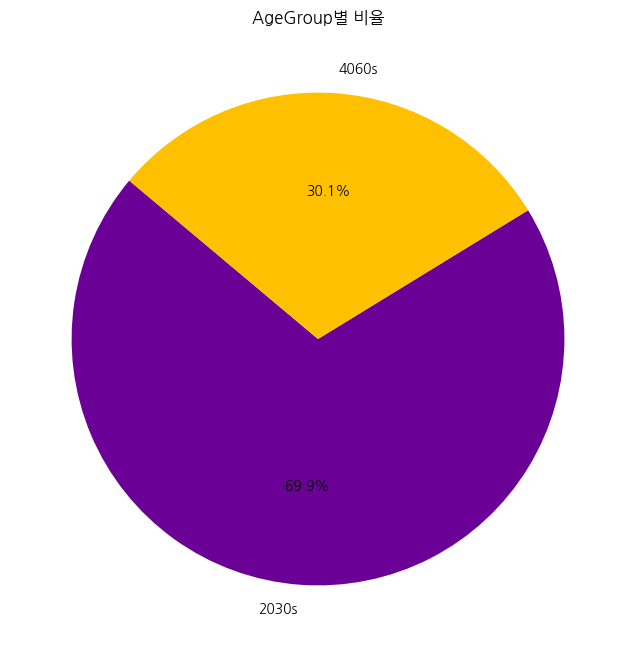

In [ ]:
# Gender 카운 계산
gender_counts = df['AgeGroup'].value_counts(normalize=True)

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('AgeGroup별 비율')
plt.show()

In [ ]:
gender_counts.round(3)

AgeGroup
2030s    0.699
4060s    0.301
Name: proportion, dtype: float64

- Agegroup 별 비율이 2030: 69.9% , 4060: 30.1% 으로 2030이 39.8% 더 많음.
- 이는 런칭 당시 가입한 고객이 대부분인 자사가 2030 대상으로 마케팅을 했을 것이라고 추측.
- 2030이 현재 우리의 주 고객층일 것.

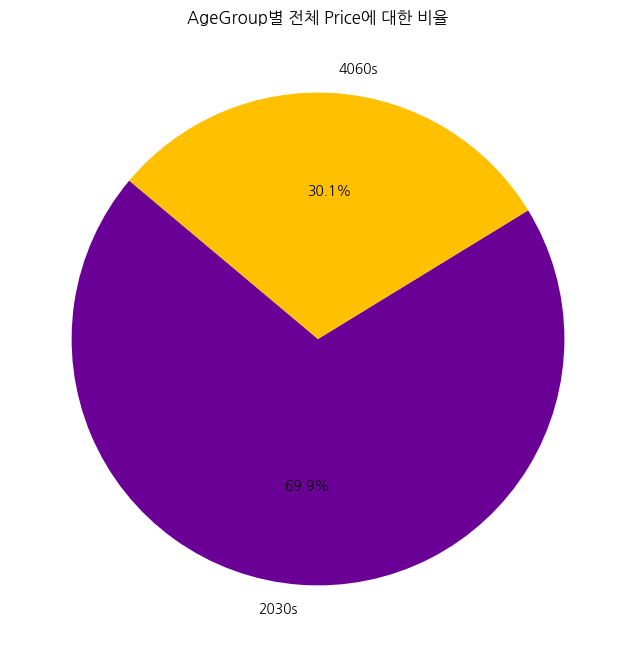

In [ ]:
# AgeGroup별 Price의 합계 계산
agegroup_price_sum = df.groupby('AgeGroup')['Price'].sum()

# 전체 합계로 나누어 비율 계산
total_price_sum = agegroup_price_sum.sum()
agegroup_price_ratio = agegroup_price_sum / total_price_sum

# 비율을 시각화하기 위해 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(agegroup_price_ratio, labels=agegroup_price_ratio.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('AgeGroup별 전체 Price에 대한 비율')
plt.show()

- Agegroup 별 매출액 비율이 2030: 69.9% , 4060: 30.1% 으로 2030이 39.8% 더 많음.
- 2030이 매출에 큰 영향을 끼치고 있음.

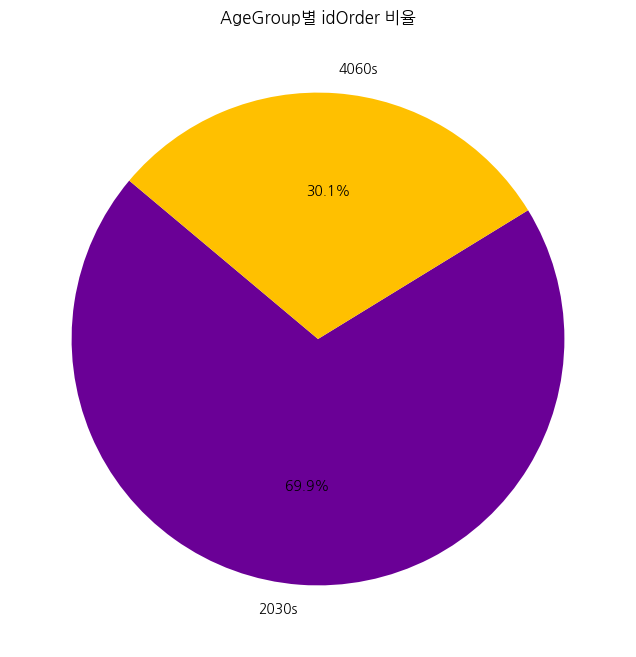

In [ ]:
# AgeGroup별 idOrder의 빈도수(개수)를 비율로 계산
agegroup_order_counts = df['AgeGroup'].value_counts(normalize=True)

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(agegroup_order_counts, labels=agegroup_order_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('AgeGroup별 idOrder 비율')
plt.show()

- Agegroup 별 주문 비율이 2030: 69.9% , 4060: 30.1% 으로 2030이 39.8% 더 많음.
- 2030의 주문량이 많다.
- 2030이 우리의 주고객층임을 확인할 수 있음.

In [ ]:
df.columns

Index(['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT',
       'Delay_YN', 'ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode',
       'ItemMiddleName', 'ItemSmallCode', 'ItemSmallName', 'ItemName',
       'Gender', 'Age', 'FamilyCount', 'MemberYN', 'AgeGroup', 'Date', 'Year',
       'Month', 'Day', 'Hour', 'CleanedItemName', 'TimeBetweenOrders',
       'Combined', 'Weekday', 'WeekdayName'],
      dtype='object')

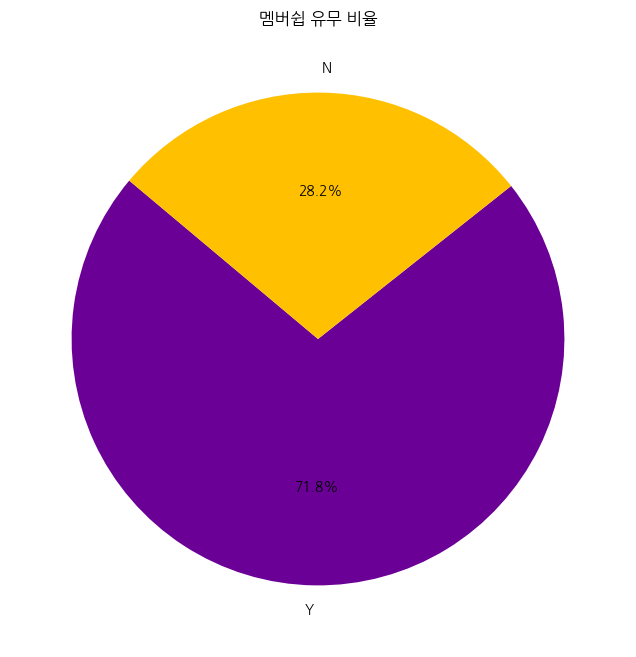

In [ ]:
# Membership 유무 카운트 계산
membership_counts = df['MemberYN'].value_counts(normalize=True)

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('멤버쉽 유무 비율')
plt.show()

- 전체 고객 중 71.8%의 고객이 멤버쉽에 가입했음.
- 멤버쉽의 혜택이 효과적인 것으로 보임.

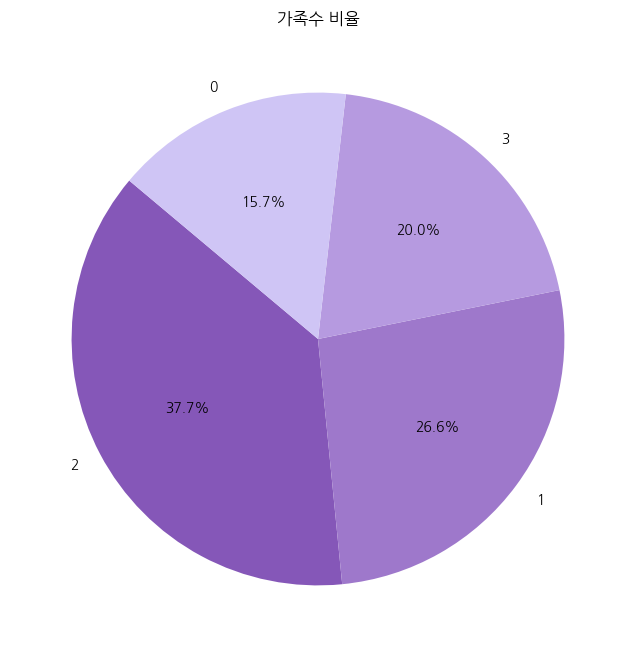

In [ ]:
# FamilyCount 카운트 계산
familycount_counts = df['FamilyCount'].value_counts(normalize=True)

palette = ['#8557b8','#9e78cb','#b69ae0','#cfc5f5']

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(familycount_counts, labels=familycount_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('가족수 비율')
plt.show()

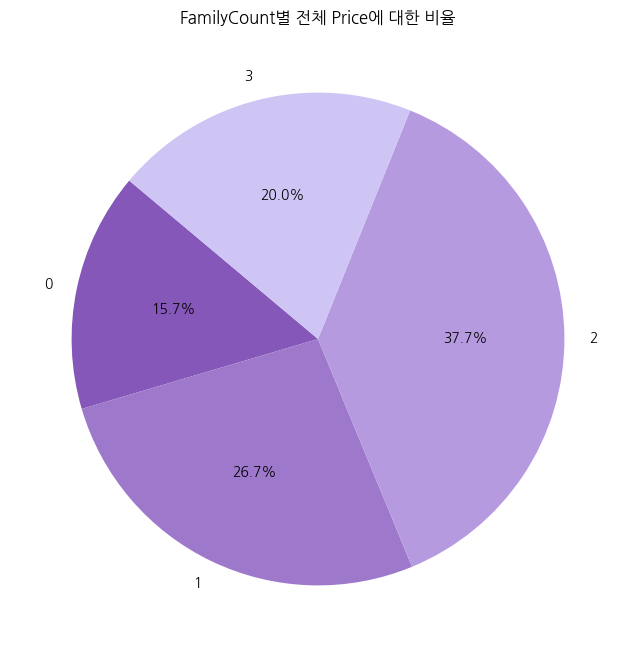

In [ ]:
# FamilyCount별 Price의 합계 계산
familycount_price_sum = df.groupby('FamilyCount')['Price'].sum()

# 전체 합계로 나누어 비율 계산
total_price_sum = familycount_price_sum.sum()
familycount_price_ratio = familycount_price_sum / total_price_sum

# 비율을 시각화하기 위해 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(familycount_price_ratio, labels=familycount_price_ratio.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('FamilyCount별 전체 Price에 대한 비율')
plt.show()

- 가족수 별 고객의 수 비율과 매출액 비율이 거의 유사
- 가족의 수가 많다고 매출액이 유의미하게 증가하는 건 아닌 듯.

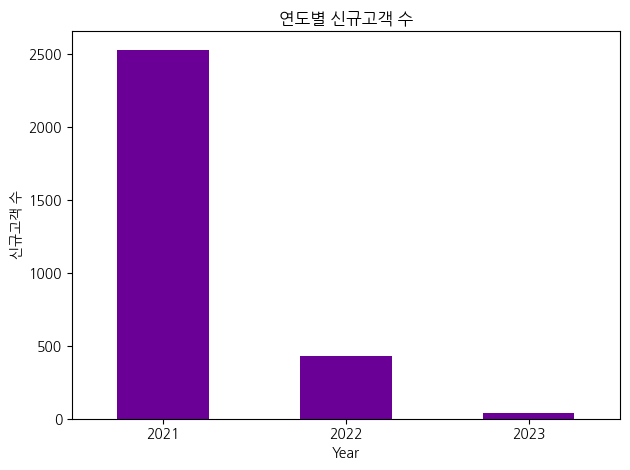

In [ ]:
first_order = df[['idUser','OrderDT','Year']].sort_values(['idUser','OrderDT'])
first_order.drop_duplicates('idUser', inplace = True)
# Year 별로 idUser의 수를 계산
user_count_by_year = first_order.groupby('Year')['idUser'].count()
# 그래프 그리기
user_count_by_year.plot(kind='bar', color='#6A0096')
plt.title('연도별 신규고객 수')
plt.xlabel('Year')
plt.ylabel('신규고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
user_count_by_year

Year
2021    2532
2022     431
2023      37
Name: idUser, dtype: int64

- 2021년 런칭 당시 약 2500명의 신규고객 가입.
- 하지만 2022년에는 431명, 2023년에는 37명으로 신규고객 수 대폭 감소.
- 신규고객 유치 방안이 필요해 보임.

In [ ]:
###신규고객 감소율
user_count_by_year = pd.DataFrame(user_count_by_year)
user_count_by_year.rename(columns={'idUser': 'Value'}, inplace=True)
# 이전 연도 값
previous_year_value = user_count_by_year['Value'].shift(1)
# 감소율 계산
decrease_rate = ((previous_year_value - user_count_by_year['Value']) / previous_year_value) * 100
# 결과 출력
decrease_rate.dropna(inplace=True)  # 첫 번째 행은 비교할 이전 연도 값이 없으므로 삭제
print(decrease_rate)

Year
2022    82.977883
2023    91.415313
Name: Value, dtype: float64


In [ ]:
## 이탈고객수 (최근 100일간 주문을 하지 않은 고객)
last_order = df[['idUser','OrderDT','Year','Month','Day']].sort_values(['idUser','OrderDT'])
last_order.drop_duplicates('idUser', inplace = True, keep = 'last')
# 100일전 2023년 9월 22일 기준
last_order[last_order['OrderDT'] < '2023-09-22']

,idUser,OrderDT,Year,Month,Day
52768,U10157,2023-08-23 09:02:16,2023,8,23
102567,U10301,2023-09-19 20:23:01,2023,9,19
171339,U10508,2023-09-20 11:24:49,2023,9,20
176393,U10525,2023-09-18 16:35:40,2023,9,18
289902,U10860,2023-06-21 21:46:29,2023,6,21
477577,U11411,2023-08-23 09:54:47,2023,8,23
547426,U11614,2023-08-24 20:54:41,2023,8,24
578575,U11703,2023-09-18 22:31:00,2023,9,18
825667,U12432,2023-09-06 06:27:14,2023,9,6
855709,U12524,2023-09-04 20:05:16,2023,9,4


- 최근 100일간 주문하지 않은 고객 (이탈고객): 12명
- 기존 가입고객들은 대부분 이탈하지 않고 서비스를 이용 중.

In [ ]:
order_price_sum = df.groupby('idOrder')['Price'].sum().reset_index()

# 중복 제거를 위해 IDOrder와 MemberYN만 남기고 중복 제거
orders_df_merged_unique = df.drop_duplicates(subset=['idOrder'])

# IDOrder별 Price 합계와 MemberYN 정보를 결합
order_price_sum_with_membership = pd.merge(order_price_sum, orders_df_merged_unique[['idOrder', 'MemberYN']], on='idOrder', how='left')

# Price 합계 기준으로 내림차순 정렬하고 상위 5개 선택
top_5_orders_with_membership = order_price_sum_with_membership.sort_values(by='Price', ascending=False).tail(10)

top_5_orders_with_membership

,idOrder,Price,MemberYN
121666,U12064-O2021-1011,1560,Y
57150,U10974-O2021-1015,1530,Y
56655,U10966-O2021-1022,1420,Y
18765,U10319-O2021-1004,1420,Y
154428,U12623-O2021-1007,1410,Y
87813,U11491-O2021-1017,1300,Y
168951,U12866-O2021-1014,1240,Y
21643,U10367-O2021-1001,1240,N
122067,U12070-O2021-1005,1160,Y
85395,U11450-O2021-1021,1150,N


- 적은 금액을 시킨 고객이 멤버십에 가입되어있는 경우 많음
- 멤버쉽에 가입하면 배송비가 없는 것으로 추측.

In [ ]:
grouped = df.groupby(['AgeGroup', 'Gender', 'FamilyCount', 'ItemSmallName']).size().reset_index(name='Count')
top_10_per_combination = grouped.sort_values(by=['AgeGroup', 'Gender', 'FamilyCount', 'Count'], ascending=[True, True, True, False])
top_10_per_combination = top_10_per_combination.groupby(['AgeGroup', 'Gender']).head(10)

# 조합 컬럼 생성
top_10_per_combination['Combination'] = (top_10_per_combination['AgeGroup'] + "_" + top_10_per_combination['Gender']).astype(str)

# 피벗 테이블 생성
pivot = top_10_per_combination.pivot_table(index='ItemSmallName', columns='Combination', values='Count', fill_value=0)

pivot.sort_values('2030s_남성')

Combination,2030s_남성,2030s_여성,4060s_남성,4060s_여성
ItemSmallName,,,,
고등,1898,1806,380,629
김,2043,1932,445,640
호박,2054,1953,471,673
커피,2087,1954,431,629
김치,2416,2225,467,797
즉석,2436,2265,477,807
토마,2790,2683,585,893
고구,2986,2739,604,937
사과,3592,3349,714,1124


In [ ]:
pivot = pd.DataFrame(pivot)
pivot

Combination,2030s_남성,2030s_여성,4060s_남성,4060s_여성
ItemSmallName,,,,
고구,2986,2739,604,937
고등,1898,1806,380,629
김,2043,1932,445,640
김치,2416,2225,467,797
냉동,4297,4132,885,1295
사과,3592,3349,714,1124
즉석,2436,2265,477,807
커피,2087,1954,431,629
토마,2790,2683,585,893


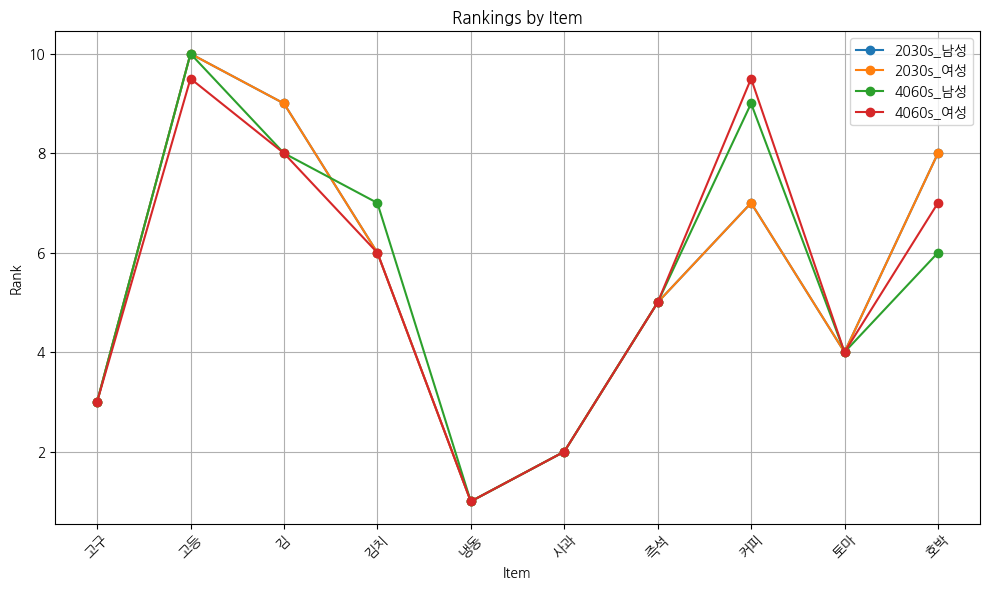

In [ ]:
pivot = pd.DataFrame(pivot)
# pivot.set_index('ItemSmallName', inplace=True)

# 컬럼별로 랭킹 매기기
rankings = pivot.rank(ascending=False, axis=0)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
for column in pivot.columns:
    plt.plot(rankings.index, rankings[column], marker='o', label=column)

plt.title('Rankings by Item')
plt.xlabel('Item')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- 사는 품목 랭킹의 차이도 서로 비슷한 추세를 가짐.
- 특성 별 판매량 순위에 차이도 크지않다. 현재 데이터로는 연령대와 성별은 상품 구매 기준에 크게 영향을 주지 않는 것으로 보임.
- 특히 2030 의 경우, 남성과 여성의 랭킹 차이가 없음.
- 2030 집단은 김과 호박을 커피 구매보다 더 선호.
- 4060 집단은 커피 구매 선호.

In [ ]:
rankings

Combination,2030s_남성,2030s_여성,4060s_남성,4060s_여성
ItemSmallName,,,,
고구,3.0,3.0,3.0,3.0
고등,10.0,10.0,10.0,9.5
김,9.0,9.0,8.0,8.0
김치,6.0,6.0,7.0,6.0
냉동,1.0,1.0,1.0,1.0
사과,2.0,2.0,2.0,2.0
즉석,5.0,5.0,5.0,5.0
커피,7.0,7.0,9.0,9.5
토마,4.0,4.0,4.0,4.0
